# Diagrama do modelo eletrodinâmico do circuito

<img src="circuito.png" alt="Diagrama do circuito" style="height: 100px; width:100px;"/>

## Importações

In [422]:
from cmath import *
from math import sqrt, pow, pi
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os

A função `CalculaTransformador` recebe os parâmetros do circuito e nos retornas as correntes no transformador primário e no secundário

In [423]:
def calcular_transformador(Uf, Rc, k, f, R1, R2, L1, L2, C, p):
    w = 2 * pi * f  # Frequência angular
    wr = 1 / sqrt(L1 * C)  # Ressonância
    M = k * sqrt(L1 * L2)  # Indutância Mútua
    # ---------- Reatâncias ----------------- #
    XL1 = 1j * w * L1  # reatância do Indutor 1
    XL2 = 1j * w * L2  # reatância do Indutor 2
    XC1 = 1 / (1j * w * C)  # reatância da Capacitor 1
    XC2 = 1 / (1j * w * C)  # reatância da Capacitor 2
    XM = 1j * w * M  # reatância da Indutância Mútua


    # ----------- Prints -------- #
    if p:
        # Reatâncias da Indutância mútua
        print(f"A Indutância Mútua M:{M} Henry")
        print(f"A frequência de ressonância Wr é: {wr / (2 * pi)} Hz")
        print(f"A frequência angular W é: {w} Rad/s")
        print(f"Reatância do indutor: {XL1}")
        print(f"Reatância do capacitor: {XC1}")
        print(f"Reatância dos transformadores: {XM}")
        print(f"-" * 30)

    # --------- Impedância Equivalente Sistema ---------------- #
    Z = np.array([[XC1 + R1 + XL1, -XM], [-XM, XL1 + R2 + ((XC1 * Rc) / (XC1 + Rc))]])

    # ------ Impedância Equivalente na Saída (RC) -------------- #
    Zeq = ((XC2 * Rc) / (XC2 + Rc))

    # ---------------- Tensão em forma fasorial ---------------- #
    V = np.array([Uf, 0])

    # -------- Correntes no primário e no secundário ----------- #
    i = np.dot(np.linalg.inv(Z), V)
    
    # --------------- Tensão de Saída (Secundário) ------------- #
    v2 = Zeq * i[1]
    return i[0], i[1], v2

## Declarações das variáveis

In [424]:

# Entradas da função: Uf(volts), Rc(ohms), k, R1(ohms), L1(Henry), C1(Henry)
Uf = 33# Tensão da fonte (pico)
Rc = 400  # Resistência do capacitor
k = 0.4714  # Coeficiente de acoplamento
f = 44646.464  # frequencia da fonte
# f = 56060  # frequencia da fonte
Vt = (2 / pi) * Uf * cos(2*  pi * f)
R1 = 825e-3  # Resistência da bobina primaria
R2 = 670e-3  # Resistência da bobina secundaria
L1 = 135e-6  # Indutância da bobina primaria
L2 = 101.4e-6  # Indutância da bobina secundaria
C1 = 1e-7  # Capacitância dos capacitores

# Cálculos

## Cálculo de $I_1$ e $I_2$

In [425]:
i1, i2, v2 = calcular_transformador(Vt, Rc, k, f, R1, R2, L1, L2, C1, True)
print(f"i1: {i1}")  # Corrente no primário em sua forma fasorial
print(f"i2: {i2}")  # Corrente no secundário em sua forma fasorial

A Indutância Mútua M:5.51538e-05 Henry
A frequência de ressonância Wr é: 43316.48895742645 Hz
A frequência angular W é: 280522.0066223223 Rad/s
Reatância do indutor: 37.870470894013515j
Reatância do capacitor: -35.64782713629804j
Reatância dos transformadores: 15.471854648846241j
------------------------------
i1: (-0.33916618926135134-0.20118451927188147j)
i2: (-0.05945136266244476-1.3340773542279238j)


## Cálculos Adicionais

Cálculo de:
- Tensão $V_2$ (Tensão de Saída)
- Correntes e tensões de pico
- Relação $\frac{V_1}{V_2}$
- Potências

In [426]:
# ------------------------------ Tensão de Saída ----------------------------- #
print('Com resistor na saída de %.2f Ω:' %Rc)
print('i1 (pico) = %.3f A' %np.abs(i1))
print('i2 (pico) = %.3f A' %np.abs(i2))
print('V1 (pico) = %.3f V' %Uf)
print('V2 (pico) = %.8f V' %(np.abs(v2)))
print('Relação V1/V2 = %.8f' %(np.abs(Uf/(v2))))



Com resistor na saída de 400.00 Ω:
i1 (pico) = 0.394 A
i2 (pico) = 1.335 A
V1 (pico) = 33.000 V
V2 (pico) = 47.41623312 V
Relação V1/V2 = 0.69596418


# Gráficos

## Gráfico de $I_1$ e $I_2$ em função da frequência 

Módulos das correntes em função da frequência da fonte sendo o coef. de acoplamento = 0.4714
Corrente máxima I1 = 5.878150358437183 para uma frequencia de 56060.606060606064
------------------------------
Corrente máxima I2 = 5.859485481747054 para uma frequencia de 56060.606060606064


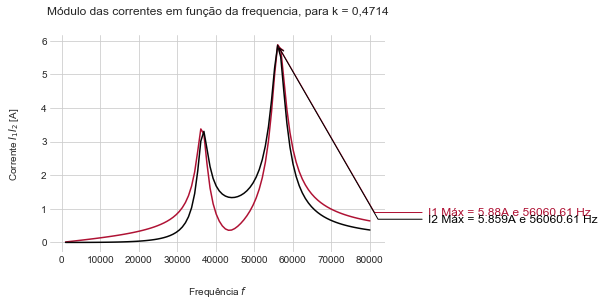

In [427]:
#Construção de gráficos de I1 e I2 em função da frequência:
#Frequencia que vai de 10hz - 100khz
F = np.linspace(1000,80000,100)
I1 = []
I2 = []
print("Módulos das correntes em função da frequência da fonte sendo o coef. de acoplamento = {}".format(k))

max_i1 = 0
max_i2 = 0

for f in F:
    i1, i2, v2 = calcular_transformador(Vt, Rc, k, f, R1, R2, L1, L2, C1, False)
    mod_i1 = abs(i1)
    mod_i2 = abs(i2)

    I1.append(mod_i1)
    I2.append(mod_i2)

    if mod_i1 > max_i1:
        max_i1 = mod_i1
        f_max_i1 = f

    if mod_i2 > max_i2:
        max_i2 = mod_i2
        f_max_i2 = f

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
text1 = "I1 Máx = {:.2f}A e {:.2f} Hz".format(max_i1, f_max_i1)
text2 = "I2 Máx = {:.3f}A e {:.2f} Hz".format(max_i2, f_max_i2)
bbox_props = dict(boxstyle='round', fc='w', ec='k', lw=1,alpha=0)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=-60")
arrowpropsred=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=-60",color="#af1234")
ax.annotate(text1, xy=(f_max_i1, max_i1), xytext=(95000,0.8), bbox=bbox_props, arrowprops=arrowpropsred, color="#af1234", fontsize=12)
ax.annotate(text2, xy=(f_max_i2, max_i2), xytext=(95000,0.6), bbox=bbox_props, arrowprops=arrowprops,color="#050505", fontsize=12)
ax.spines['left'].set_visible(False)
plt.style.use('seaborn-whitegrid')
plt.plot(F, I1, label="corrente I1", color="#af1234")
plt.plot(F, I2, label="corrente I2", color="#050505")
plt.title("Módulo das correntes em função da frequencia, para k = 0,4714",pad=20)
plt.xlabel("Frequência $f$",labelpad=20)
plt.ylabel("Corrente $I_1 I_2$ [A]",labelpad=20)
plt.grid(True)
plt.savefig("correntes_frequencia.png", dpi=300)

print("Corrente máxima I1 = {} para uma frequencia de {}".format(max_i1, f_max_i1))
print("-" * 30)
print("Corrente máxima I2 = {} para uma frequencia de {}".format(max_i2, f_max_i2))


## Gráfico de   e   em função da frequência e variando K

In [428]:
K = np.linspace(0.1, 0.5, 50)
F = np.linspace(1000,80000,100)
for i in range(len(K)):
    I1 = []
    I2 = []
    max_i1 = 0
    max_i2 = 0
    for f in F:
        i1, i2, v2 = calcular_transformador(Vt, Rc, K[i],f, R1,R2, L1,L2, C1, False)
        mod_i1 = abs(i1)
        mod_i2 = abs(i2)

        I1.append(mod_i1)
        I2.append(mod_i2)

        if mod_i1 > max_i1:
            max_i1 = mod_i1
            f_max_i1 = f

        if mod_i2 > max_i2:
            max_i2 = mod_i2
            f_max_i2 = f

#     fig, ax = plt.subplots()
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     plt.xlim(1000, 150000)
#     plt.ylim(0, 3)
#     plt.style.use('seaborn-whitegrid')
#     plt.plot(F, I1, label="corrente I1".format(K[i]), color="#af1234", linewidth=3)
#     plt.plot(F, I2, label="corrente I2".format(K[i]), color="#050505", linewidth=3)
#     plt.annotate("K = {}".format(round(K[i],2)), xy=(10000, 2.5))
#     plt.legend(frameon=False)
#     plt.title("Módulo das correntes em função de K", pad=20)
#     plt.xlabel("Frequência $f$",labelpad=20)
#     plt.ylabel("Correntes [A]",labelpad=20)
#     plt.savefig(f'Coef_acoplamento_{K[i]}.png', dpi=300)

# # Abaixo estamos pegando todos os plots gerados e criando uma animação em gif, ver o arquivo Coef_acoplamento.gif
# with imageio.get_writer('Coef_acoplamento.gif', mode='i') as writer:
#     for i in range(len(K)):
#         image = imageio.imread(f'Coef_acoplamento_{K[i]}.png')
#         writer.append_data(image)
#         os.remove(f'Coef_acoplamento_{K[i]}.png')





## Gráfico de Potência e Eficiência em função da frequência

In [429]:
K = np.linspace(0.2, 0.25, 80)
F = np.linspace(1000,80000,200)

for k in range(len(K)):
    L_s1 = []   # Lista para armazenar os valores de potência no primário
    L_s2 = []   # Lista para armazenar os valores de potência no secundário

    max_s1 = 0
    max_s2 = 0

    f_max_s1 = 0
    f_max_s2 = 0
    for f in F:
        i1, i2, v2 = calcular_transformador(Vt, Rc, k, f, R1, R2, L1, L2, C1, False)
        i_rc = v2 / Rc

        # Potências:
        S1 = (Vt * i1.conjugate()/2)
        S2 = (v2**2)/Rc

        if S1 > max_s1:
            max_s1 = S1
            f_max_s1 = f

        if S2 > max_s2:
            max_s2 = S2
            f_max_s2 = f

        L_s1.append(abs(S1))
        L_s2.append(abs(S2))

#     fig, ax = plt.subplots()
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     plt.xlim(1000, 80000)
#     plt.ylim(0, 15)
#     plt.style.use('seaborn-whitegrid')
#     plt.plot(F, L_s1, label="Potencia S1".format(K[i]), color="#af1234", linewidth=3)
#     plt.plot(F, L_s2, label="Potencia S2".format(K[k]), color="#050505", linewidth=3)
#     plt.annotate("K = {}".format(round(K[k],2)), xy=(10000, 2.5))
#     plt.legend(frameon=False)
#     plt.title("Módulo das Potencias em função de K", pad=20)
#     plt.xlabel("Frequência $f$",labelpad=20)
#     plt.ylabel("potencias [W]",labelpad=20)
#     plt.savefig(f'Potencia_{K[k]}.png', dpi=300)

# # Abaixo estamos pegando todos os plots gerados e criando uma animação em gif, ver o arquivo Coef_acoplamento.gif
# with imageio.get_writer('Potencias.gif', mode='i') as writer:
#     for i in range(len(K)):
#         image = imageio.imread(f'Potencia_{K[i]}.png')
#         writer.append_data(image)
#         os.remove(f'Potencia_{K[i]}.png')


Potencia máxima S1 = (60.171590993970916-0.3436470689205191j) para uma frequencia de 56060.606060606064
------------------------------
Potencia máxima S2 = (34.41687620683839+8.881784197001252e-16j) para uma frequencia de 56060.606060606064


d:\anaconda-Python\lib\site-packages\matplotlib\text.py:1761: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


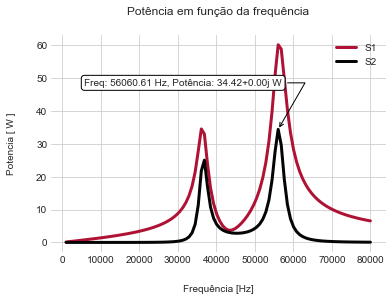

In [430]:
F = np.linspace(1000,80000,100) # Intervalo de frequências de 10Hz até 50kHz
L_s1 = []   # Lista para armazenar os valores de potência no primário
L_s2 = []   # Lista para armazenar os valores de potência no secundário

max_s1 = 0
max_s2 = 0

f_max_s1 = 0
f_max_s2 = 0
k = 0.4714
for f in F:
    i1, i2, v2 = calcular_transformador(Vt, Rc, k, f, R1, R2, L1, L2, C1, False)
    i_rc = v2 / Rc
    # Potências:
    S1 = Vt * i1.conjugate() / 2
    S2 = v2 * i_rc.conjugate() / 2
    if S1 > max_s1:
        max_s1 = S1
        f_max_s1 = f
    if S2 > max_s2:
        max_s2 = S2
        f_max_s2 = f
    L_s1.append(abs(S1))
    L_s2.append(abs(S2))

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.style.use('seaborn-whitegrid')

text = "Freq: {:.2f} Hz, Potência: {:.2f} W".format(f_max_s2, max_s2)
bbox_props = dict(boxstyle='round', fc='white', ec='black', lw=1)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")

ax.annotate(text, xy=(f_max_s2,max_s2), xytext=(0.1,0.8), **kw)




plt.plot(F, L_s1, label="S1", color="#af1234",linewidth=3)
plt.plot(F, L_s2, label="S2", color="#050505",linewidth=3)
plt.legend(frameon=False)
plt.xlabel("Frequência [Hz]",labelpad=20)
plt.ylabel("Potencia [ W ]", labelpad=20)
plt.title("Potência em função da frequência", pad=20)
print("Potencia máxima S1 = {} para uma frequencia de {}".format(max_s1, f_max_s1))
print("-" * 30)
print("Potencia máxima S2 = {} para uma frequencia de {}".format(max_s2, f_max_s2))
plt.savefig(f'Potencia.png', dpi=300)


## Gráfico da Tensão de Pico no Secundário em Função do Coeficiente de Acoplamento

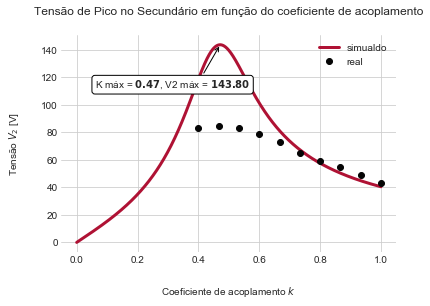

In [431]:
K=np.linspace(0,1,1000)
V2=[]
f = 36636 # Frequencia fixa, usamos a de pico
w = 2 * pi * f
max_k = 0
max_v2 = 0

for k in K:
    m = k*sqrt(L1*L1)
    xm = 1j*w*m
    i1, i2, v2 = calcular_transformador(Vt, Rc, k, f, R1, R2, L1, L2, C1, False)
    V2.append(abs(v2))


k_max = K[V2.index(max(V2))]
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.style.use('seaborn-whitegrid')

# the text will have k_max and max_v2 in bold
text = r"K máx = $\bf{%.2f}$, V2 máx = $\bf{%.2f}$" % (k_max, max(V2))
bbox_props = dict(boxstyle='round', fc='white', ec='black', lw=1)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")

ax.annotate(text, xy=(k_max,max(V2)), xytext=(0.1,0.8), **kw)

#somente para comparacao, medimos o V2, na carga, alimentando o primario com 33v, esses valores so servem para comparar com uma entreada de 33v
v2_real = [83,85, 83, 79, 73, 65, 59, 55, 49, 43]
dist_real = np.linspace(0.4,1,10)



plt.plot(K,V2,label='simualdo', color="#af1234",linewidth=3)
plt.plot(dist_real, v2_real, 'o', label='real', color="#050505", )
plt.legend()
plt.xlabel("Coeficiente de acoplamento $k$",labelpad=20)
plt.ylabel("Tensão $V_2$ [V]",labelpad=20)
plt.grid(True)
plt.title("Tensão de Pico no Secundário em função do coeficiente de acoplamento", pad=20)
plt.savefig("tensão_acoplamento.png", dpi=400)
